In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 89% 105M/119M [00:01<00:00, 147MB/s] 
100% 119M/119M [00:01<00:00, 113MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/chest-ctscan-images.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
from datetime import datetime
import time

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, Dense, GlobalAveragePooling2D, BatchNormalization, Flatten

# You may need to organize the rest of your code as well for better readability and maintainability.


In [ ]:
# Define the directories containing your image data
train_dir = '/content/Data/train'
validation_dir = '/content/Data/valid'
test_dir = '/content/Data/test'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 10


# Data Augmentation for Train Data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2, 1.0],
    channel_shift_range=100,  # Random channel shifts
    fill_mode='nearest',
    preprocessing_function=lambda x: x + np.random.normal(loc=0.0, scale=0.2, size=x.shape)  # Add Gaussian noise
)


# Rescaling for Validation and Test Data
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow images from directories and resize
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
# Check the class indices
print("Class Indices:")
print(train_generator.class_indices)

# Check the number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)

# Define the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

# Define the new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Class Indices:
{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}
Number of Classes: 4


In [ ]:
# Record the start time
start_time = datetime.now()

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Record the end time
end_time = datetime.now()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

**DenseNet121**

In [ ]:
# Define the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



29084464/29084464 [==============================] - 0s 0us/step


In [ ]:

# Record the start time
start_time = datetime.now()

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Record the end time
end_time = datetime.now()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

**2D CNN**


In [ ]:
# Check the number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)

# Define the input shape
input_shape = (img_height, img_width, 3)  # Assuming RGB images

# Define your 2D CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Number of Classes: 4


In [ ]:
# Record the start time
start_time = datetime.now()

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Record the end time
end_time = datetime.now()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [ ]:
# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

**U-net**

In [ ]:
def unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Batch normalization for better convergence
    conv9 = BatchNormalization()(conv9)

    # Global average pooling to collapse spatial dimensions
    gap = GlobalAveragePooling2D()(conv9)

    # Output layer with sigmoid activation for binary classification
    outputs = Dense(1, activation='sigmoid')(gap)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the U-Net model
model = unet(input_shape=(img_width, img_height, 3))

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import time
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/10


**Alex-Net**

In [ ]:
# Define a transform without normalization
transform_without_norm = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

# Load a subset of your dataset without normalization to verify labeling
train_dataset_without_norm = torchvision.datasets.ImageFolder(root=train_dir, transform=transform_without_norm)

# Calculate mean and standard deviation for normalization
loader = torch.utils.data.DataLoader(train_dataset_without_norm, batch_size=len(train_dataset_without_norm), num_workers=2)

mean = 0.
std = 0.
nb_samples = 0.
for inputs, _ in loader:
    batch_samples = inputs.size(0)
    inputs = inputs.view(batch_samples, inputs.size(1), -1)
    mean += inputs.mean(2).sum(0)
    std += inputs.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print("Calculated Mean:", mean)
print("Calculated Std:", std)

Calculated Mean: tensor([0.3610, 0.3610, 0.3610])
Calculated Std: tensor([0.2073, 0.2073, 0.2073])


In [ ]:
import torch
import torchvision
from torchvision import transforms

# Define transforms for the images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),  # Random cropping and resizing
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Random color jitter
    transforms.RandomRotation(degrees=90),  # Random rotation up to 90 degrees
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomVerticalFlip(p=0.5),  # Random vertical flip
    transforms.RandomGrayscale(p=0.1),  # Randomly convert images to grayscale
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])

# Load the dataset with normalization and augmentation
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
validation_dataset = torchvision.datasets.ImageFolder(root=validation_dir, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)

# Define batch size
batch_size = 32

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained AlexNet model
alexnet = torchvision.models.alexnet(pretrained=True)


In [ ]:
# Lists to store validation history
val_loss_history = []
val_acc_history = []

# Train the model
num_epochs = 10
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Print epoch number
    print('Epoch %d:' % (epoch + 1))

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Print training statistics after each epoch
    print('Training Loss: %.3f | Training Accuracy: %.2f%%' %
          (running_loss / len(train_loader), 100 * correct / total))

    # Store training loss and accuracy for plotting
    train_loss_history.append(running_loss / len(train_loader))
    train_acc_history.append(correct / total)

    # Validation after each epoch
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in validation_loader:
            images, labels = data
            outputs = alexnet(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Print validation statistics after each epoch
    print('Validation Loss: %.3f | Validation Accuracy: %.2f%%' %
          (val_running_loss / len(validation_loader), 100 * val_correct / val_total))

    # Store validation loss and accuracy for plotting
    val_loss_history.append(val_running_loss / len(validation_loader))
    val_acc_history.append(val_correct / val_total)

print('Finished Training')
print('Time taken:', time.time() - start_time)


Epoch 1:
Training Loss: 1.170 | Training Accuracy: 53.02%
Validation Loss: 1.460 | Validation Accuracy: 45.83%
Epoch 2:
Training Loss: 1.174 | Training Accuracy: 47.96%
Validation Loss: 1.283 | Validation Accuracy: 48.61%
Epoch 3:
Training Loss: 1.043 | Training Accuracy: 54.16%
Validation Loss: 1.245 | Validation Accuracy: 54.17%
Epoch 4:
Training Loss: 1.069 | Training Accuracy: 54.81%
Validation Loss: 1.539 | Validation Accuracy: 41.67%
Epoch 5:
Training Loss: 1.064 | Training Accuracy: 52.69%
Validation Loss: 1.516 | Validation Accuracy: 54.17%
Epoch 6:
Training Loss: 1.124 | Training Accuracy: 49.27%
Validation Loss: 1.415 | Validation Accuracy: 50.00%
Epoch 7:
Training Loss: 1.300 | Training Accuracy: 49.92%
Validation Loss: 2.171 | Validation Accuracy: 41.67%
Epoch 8:
Training Loss: 1.333 | Training Accuracy: 47.63%
Validation Loss: 1.531 | Validation Accuracy: 43.06%
Epoch 9:
Training Loss: 1.119 | Training Accuracy: 53.02%
Validation Loss: 1.348 | Validation Accuracy: 43.06%
E

In [ ]:
import matplotlib.pyplot as plt
import time

# Lists to store training history
train_loss_history = []
train_acc_history = []

# Lists to store validation history
val_loss_history = []
val_acc_history = []

# Train the model
num_epochs = 10
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Print epoch number
    print('Epoch %d:' % (epoch + 1))

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Print training statistics after each epoch
    print('Training Loss: %.3f | Training Accuracy: %.2f%%' %
          (running_loss / len(train_loader), 100 * correct / total))

    # Store training loss and accuracy for plotting
    train_loss_history.append(running_loss / len(train_loader))
    train_acc_history.append(correct / total)

    # Validation after each epoch
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in validation_loader:
            images, labels = data
            outputs = alexnet(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Print validation statistics after each epoch
    print('Validation Loss: %.3f | Validation Accuracy: %.2f%%' %
          (val_running_loss / len(validation_loader), 100 * val_correct / val_total))

    # Store validation loss and accuracy for plotting
    val_loss_history.append(val_running_loss / len(validation_loader))
    val_acc_history.append(val_correct / val_total)

print('Finished Training')
print('Time taken:', time.time() - start_time)



Epoch 1:
Training Loss: 1.102 | Training Accuracy: 56.93%
Validation Loss: 1.400 | Validation Accuracy: 52.78%
Epoch 2:
Training Loss: 1.187 | Training Accuracy: 53.83%
Validation Loss: 1.338 | Validation Accuracy: 48.61%
Epoch 3:
Training Loss: 1.312 | Training Accuracy: 52.04%
Validation Loss: 1.778 | Validation Accuracy: 50.00%
Epoch 4:
Training Loss: 1.319 | Training Accuracy: 50.57%
Validation Loss: 1.393 | Validation Accuracy: 50.00%
Epoch 5:
Training Loss: 1.158 | Training Accuracy: 51.88%
Validation Loss: 1.299 | Validation Accuracy: 43.06%
Epoch 6:
Training Loss: 1.448 | Training Accuracy: 52.69%
Validation Loss: 1.448 | Validation Accuracy: 44.44%
Epoch 7:
Training Loss: 1.274 | Training Accuracy: 49.43%
Validation Loss: 1.424 | Validation Accuracy: 50.00%
Epoch 8:
Training Loss: 1.192 | Training Accuracy: 52.69%
Validation Loss: 1.821 | Validation Accuracy: 40.28%
Epoch 9:
Training Loss: 1.297 | Training Accuracy: 51.71%
Validation Loss: 2.333 | Validation Accuracy: 38.89%
E

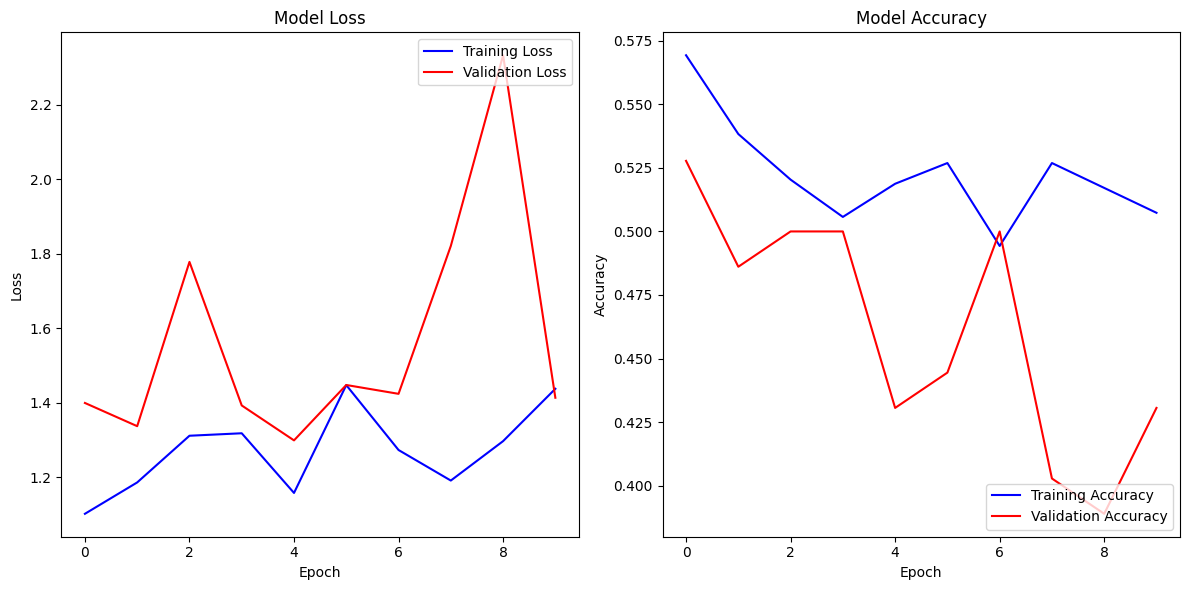

In [ ]:
# Plotting the training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, color='blue', label='Training Loss')
plt.plot(val_loss_history, color='red', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, color='blue', label='Training Accuracy')
plt.plot(val_acc_history, color='red', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on test set
criterion = nn.CrossEntropyLoss()

test_correct = 0
test_total = 0
test_running_loss = 0.0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()

print('Accuracy of the network on the test images: %d %%' % (100 * test_correct / test_total))
print('Test Loss: %.3f' % (test_running_loss / len(test_loader)))


Accuracy of the network on the test images: 46 %
Test Loss: 1.447
